In [1]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


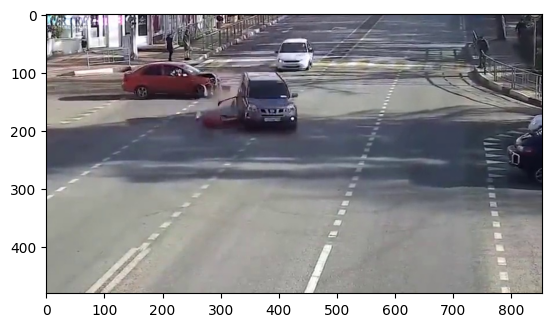

In [3]:
img = plt.imread('10.jpg')   # reading image using its name
plt.imshow(img)

In [4]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data["Class"] =  data["Class"].astype(str) 
data.head()


,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)

train_generator = datagen.flow_from_dataframe(dataframe=data, directory="C://Users//harma//Amity//Major Project//ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main",
                                              x_col="Image_ID", y_col="Class",
                                              subset="training", batch_size=32,
                                              seed=42, shuffle=True, class_mode="categorical",
                                              target_size=(224, 224))

valid_generator = datagen.flow_from_dataframe(dataframe=data, directory="C://Users//harma//Amity//Major Project//ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main",
                                              x_col="Image_ID", y_col="Class",
                                              subset="validation", batch_size=32,
                                              seed=42, shuffle=True, class_mode="categorical",
                                              target_size=(224, 224))

Found 178 validated image filenames belonging to 2 classes.
Found 44 validated image filenames belonging to 2 classes.


In [6]:
# X = [ ]     # creating an empty array
# for img_name in data.Image_ID:
#     img = plt.imread('' + img_name)
#     X.append(img)  # storing each image in array X
# X = np.array(X)    # converting list to array

In [7]:
# y = data.Class
# dummy_y = np_utils.to_categorical(y)

In [8]:
# image = []
# for i in range(0,X.shape[0]):
#     a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
#     image.append(a)
# X = np.array(image)

In [9]:
from keras.applications.vgg16 import preprocess_input
# X = preprocess_input(X,data_format=None)

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [13]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16 
from keras.layers import Dense, InputLayer, Dropout, Flatten

In [14]:
base_model = Sequential()
base_model.add (VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) )
base_model.add(Flatten())
base_model.add(Dense(1024, activation = 'relu'))
base_model.add(Dense(2, activation = 'softmax'))

In [15]:
base_model.compile(optimizer = 'adam' , loss= 'categorical_crossentropy' , metrics = ['accuracy'])
base_model.fit(train_generator ,epochs = 10, validation_data = valid_generator )

Epoch 1/10
6/6 [==============================] - 145s 24s/step - loss: 33.7437 - accuracy: 0.5393 - val_loss: 0.8188 - val_accuracy: 0.5909
Epoch 2/10
6/6 [==============================] - 142s 24s/step - loss: 1.2218 - accuracy: 0.5225 - val_loss: 0.6389 - val_accuracy: 0.6364
Epoch 3/10
6/6 [==============================] - 142s 24s/step - loss: 0.7838 - accuracy: 0.4719 - val_loss: 0.6876 - val_accuracy: 0.5909
Epoch 4/10
6/6 [==============================] - 141s 24s/step - loss: 0.7485 - accuracy: 0.4438 - val_loss: 1.0309 - val_accuracy: 0.4318
Epoch 5/10
6/6 [==============================] - 142s 24s/step - loss: 0.6723 - accuracy: 0.6180 - val_loss: 1.4565 - val_accuracy: 0.4318
Epoch 6/10
6/6 [==============================] - 143s 24s/step - loss: 0.7365 - accuracy: 0.5169 - val_loss: 0.7832 - val_accuracy: 0.4318
Epoch 7/10
6/6 [==============================] - 141s 23s/step - loss: 0.6653 - accuracy: 0.6011 - val_loss: 0.7105 - val_accuracy: 0.4318
Epoch 8/10
6/6 [===

In [16]:
# X_train = base_model.predict(X_train)
# X_valid = base_model.predict(X_valid)
# X_train.shape, X_valid.shape

In [17]:
# X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
# X_valid = X_valid.reshape(67, 7*7*512)

In [18]:
# train = X_train/X_train.max()      # centering the data
# X_valid = X_valid/X_train.max()

In [19]:
# model = Sequential()
# model.add(InputLayer((7*7*512,)))    # input layer
# model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
# model.add(Dense(2, activation='softmax'))    # output layer

In [31]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 40,407,874
Trainable params: 40,407,874
Non-trainable params: 0
_________________________________________________________________


In [21]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# model.fit(train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [23]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
count = 0
videoFile = "Accident-5.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [33]:
test = pd.read_csv('test.csv')

In [34]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [35]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [36]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 2s 2s/step


(9, 2)

In [37]:
# test_image = test_image.reshape(9, 7*7*512)

# # zero centered images
# test_image = test_image/test_image.max()

In [38]:
predictions = base_model.predict(test_image)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/vgg16/block1_conv1/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\harma\AppData\Local\Temp\ipykernel_18640\3446853161.py", line 1, in <module>
      predictions = base_model.predict(test_image)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\harma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/vgg16/block1_conv1/Relu'
convolution input must be 4-dimensional: [9,2]
	 [[{{node sequential/vgg16/block1_conv1/Relu}}]] [Op:__inference_predict_function_5100]

In [ ]:
print(predictions)

In [ ]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

In [ ]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = "AC8d25ed394916e01596edd70b2abd77a1"
auth_token = "98bd4f96d016af71efbb0f21811d835d"
client = Client(account_sid, auth_token)

In [ ]:
cap = cv2.VideoCapture('Accident-5.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= "+16502977583",
                 to= "+919654429598" )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


In [ ]:
model.save("mymodel.h5")